# DP -  Lecture 4 - Data Transformation

In [1]:
import pandas as pd
import numpy as np

## Handling duplicates

In [3]:
df = pd.DataFrame({'a':[1,2,1,2], 'b' : [1,2,1,2]})
df

,a,b
0,1,1
1,2,2
2,1,1
3,2,2


In [5]:
df[df.duplicated(keep='last') == True ]

,a,b
0,1,1
1,2,2


In [6]:
df.drop_duplicates(keep='last')

,a,b
2,1,1
3,2,2


## Normalization and Scaling

In [7]:
pip install mlxtend --upgrade --no-deps

Note: you may need to restart the kernel to use updated packages.


In [8]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [9]:
original_Data = np.random.exponential(size = 1000)

In [11]:
original_Data[0:10]

array([0.79587451, 1.25593076, 0.92322315, 0.78720115, 0.55104849,
       1.03815929, 0.5755192 , 2.22352441, 3.31491218, 0.4836021 ])

In [13]:
scaled_data = minmax_scaling(original_Data, columns=[0])
scaled_data[0:10]

array([[0.09290694],
       [0.14664878],
       [0.10778327],
       [0.09189375],
       [0.06430738],
       [0.12120963],
       [0.06716595],
       [0.25967902],
       [0.38717038],
       [0.05642858]])

Text(0.5, 1.0, 'Scaled Data')

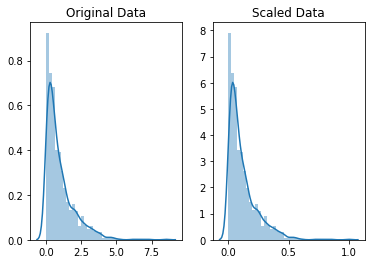

In [30]:
#plot together to compare

fig, ax = plt.subplots(1,2)
sns.distplot(original_Data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled Data")

In [19]:
#normallize the exponential data

from scipy import stats
normalized_data = stats.boxcox(original_Data)
normalized_data[0:1]


(array([-0.22212062,  0.23427768, -0.07911706, -0.23247555, -0.55495228,
         0.03761946, -0.5171396 ,  0.88159381,  1.39032005, -0.66621063,
         0.47583326, -0.27457467, -0.17137354,  1.07417631, -1.93388177,
        -1.81769862, -2.52061525,  0.62361343,  0.43027336,  0.77833579,
         1.59225785,  0.50144209, -0.45295886,  0.43813594, -1.62973742,
         0.02125996, -1.5015741 ,  1.21197552, -0.29312863, -0.57953899,
        -1.02646264,  0.41736265, -0.46721082, -0.17034415, -2.5492186 ,
        -0.03919746, -0.05410238, -0.04108732,  1.20458443,  0.13777305,
        -0.73433115, -0.51864059,  0.18300978, -2.02289683,  0.0954058 ,
         0.10624095, -1.21800708, -1.57328948, -0.8648075 , -0.7222475 ,
        -0.16568278, -0.51439891,  1.79968877, -1.72276069, -1.22371274,
        -1.41860857,  0.0574782 , -1.06435804, -0.44006517, -1.09483097,
        -1.42907198, -1.67384935,  0.06638293, -1.52670478, -1.27123962,
        -0.70790097,  0.57974359, -1.7530945 ,  0.6

Text(0.5, 1.0, 'Normalized Data')

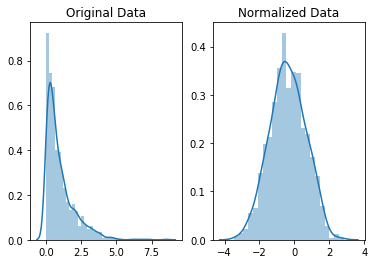

In [23]:
#plot together to compare

fig, ax = plt.subplots(1,2)
sns.distplot(original_Data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax = ax[1])
ax[1].set_title("Normalized Data")

In [24]:
import datetime

In [26]:
landslides = pd.read_csv('https://Parvathy47.github.io/Parvathy47.github.io/Landslides_Database.csv')

np.random.seed(0)

landslides.head(5)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [31]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [34]:
landslides['datetime_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

#print the first few rows
landslides['datetime_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: datetime_parsed, dtype: datetime64[ns]

## Character Encoding

In [35]:
import chardet

In [39]:
#Start with a string
before = "This is a ero symbol: €"

type(before)

str

In [40]:
after = before.encode('utf-8')
type(after)

bytes

In [42]:
print(after)

b'This is a ero symbol: \xe2\x82\xac'


In [43]:
print(after.decode('utf-8'))

This is a ero symbol: €


In [51]:
import chardet

with open("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", "rb") as rawdata :
    result = chardet.detect(rawdata.read(10000))
    
print(result)

#increasing rawdata by 1+ 0z, will change character encoding of the file

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [53]:
df = pd.read_csv("PakistanSuicideAttacks Ver 11 (30-November-2017).csv",  encoding='Windows-1252') 

df.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


## Data Aggregation

In [54]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                  'key2' : ['one', 'two', 'one', 'two', 'one'],
                  'data1' : np.random.randn(5),
                  'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
1,a,two,0.400157,0.950088
2,b,one,0.978738,-0.151357
3,b,two,2.240893,-0.103219
4,a,one,1.867558,0.410599


In [55]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [56]:
grouped.mean()

key1
a    1.343923
b    1.609816
Name: data1, dtype: float64

In [58]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     1.815805
      two     0.400157
b     one     0.978738
      two     2.240893
Name: data1, dtype: float64

## Handling missing values

In [59]:
s = pd.Series(np.random.rand(6))
s[::2] = np.nan
s

0         NaN
1    0.528895
2         NaN
3    0.925597
4         NaN
5    0.087129
dtype: float64

In [60]:
s.fillna(s.mean())

0    0.513874
1    0.528895
2    0.513874
3    0.925597
4    0.513874
5    0.087129
dtype: float64

In [61]:
states = ['Ohio', 'New york', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East']*4 + ['West']*4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio          0.443863
New york      0.333674
Vermont       1.494079
Florida      -0.205158
Oregon        0.313068
Nevada       -0.854096
California   -2.552990
Idaho         0.653619
dtype: float64

In [62]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.443863
New york      0.333674
Vermont            NaN
Florida      -0.205158
Oregon        0.313068
Nevada             NaN
California   -2.552990
Idaho              NaN
dtype: float64

In [63]:
data.groupby(group_key).mean()

East    0.190793
West   -1.119961
dtype: float64

In [66]:
fill_mean = lambda g : g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.443863
New york      0.333674
Vermont       0.190793
Florida      -0.205158
Oregon        0.313068
Nevada       -1.119961
California   -2.552990
Idaho        -1.119961
dtype: float64

In [69]:
df = pd.read_csv('Titanic.csv')
df.head()

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [70]:
df['Age'].isnull().sum()

263

In [72]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand = True)

In [74]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Capt          1
Sir           1
Lady          1
Mme           1
Dona          1
Don           1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [75]:
#replace rare titles with more common ones

mapping = {'Ms' : 'Miss', 'Major' : 'Mr', 'Col': 'Mr', 'Sir' : 'Mr',
          'Don' : 'Mr', 'Mme' : 'Mrs', 'Jonkheer' : 'Mr', 'Lady' : 'Mrs',
          'Capt' : 'Mr', 'Countess' : 'Mrs', 'Mlle' : 'Miss', 'Dona' : 'Mrs'}
df.replace({'Title' : mapping}, inplace=True)

In [76]:
df['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

In [82]:
#impute missing age values
title_ages = dict(df.groupby('Title')['Age'].median())

#create a column of average ages
df['age_med'] = df['Title'].apply(lambda x : title_ages[x])

#replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace = True)


In [84]:
del df['age_med']

In [113]:
df.isnull().sum()

Unnamed: 0       0
Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

In [89]:
df.drop(['Cabin'], axis=1, inplace=True)

In [91]:
df[df['Fare'].isnull()]

,Unnamed: 0,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
1043,152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [105]:
fare_classes = dict(df.groupby('Pclass')['Fare'].mean())

#create a column of average ages
df['fare_class'] = df['Pclass'].apply(lambda x : fare_classes[x])

#replace all missing ages with the value in this column
df['Fare'].fillna(df['fare_class'], inplace = True)

In [108]:
del df['fare_class']

In [109]:
df.head()

,Unnamed: 0,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [112]:
df['Embarked'].fillna(method='ffill', inplace = True)

## Summary Statistics

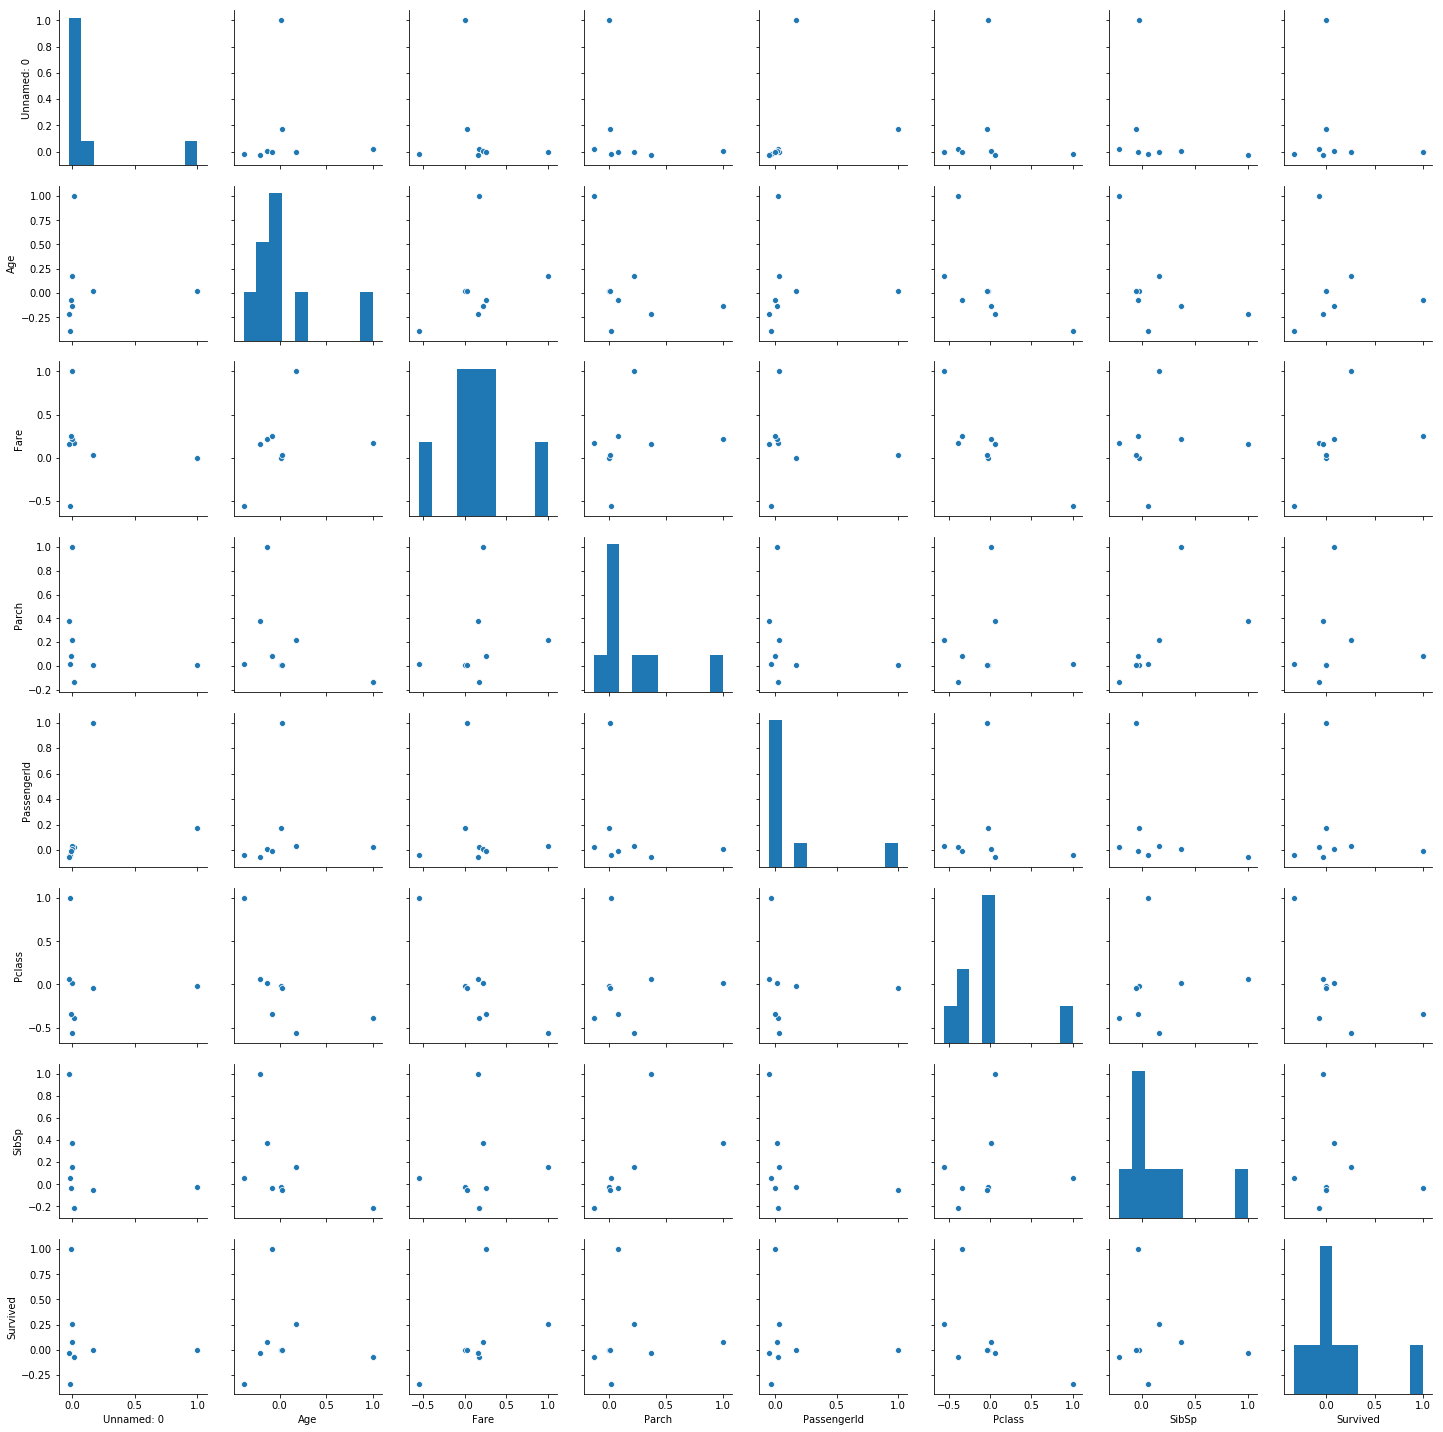

In [115]:
sns.pairplot(df.corr())

## Discretization and Binning

In [116]:
ages = [22,24, 25, 21, 23, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (18, 25], (18, 25], (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [117]:
ages = [22,24, 25, 21, 23, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins, right=False)
cats

[[18, 25), [18, 25), [25, 35), [18, 25), [18, 25), [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [120]:
cats.codes

array([0, 0, 1, 0, 0, 1, 3, 2, 2, 1], dtype=int8)

In [119]:
cats.categories

IntervalIndex([[18, 25), [25, 35), [35, 60), [60, 100)],
              closed='left',
              dtype='interval[int64]')

In [121]:
pd.value_counts(cats)

[18, 25)     4
[25, 35)     3
[35, 60)     2
[60, 100)    1
dtype: int64

In [123]:
group_name = ['Youth', 'Youngadult', 'Middleaged', 'Senior']
cats = pd.cut(ages, bins, labels=group_name)

In [124]:
cats.codes

array([0, 0, 0, 0, 0, 1, 3, 2, 2, 1], dtype=int8)

In [129]:
a1 = pd.qcut(ages, 4)
a1

[(20.999, 23.25], (23.25, 28.0], (23.25, 28.0], (20.999, 23.25], (20.999, 23.25], (28.0, 38.75], (38.75, 61.0], (38.75, 61.0], (38.75, 61.0], (28.0, 38.75]]
Categories (4, interval[float64]): [(20.999, 23.25] < (23.25, 28.0] < (28.0, 38.75] < (38.75, 61.0]]

In [132]:
a1 = pd.qcut(ages, 4, precision=2)
a1

[(20.99, 23.25], (23.25, 28.0], (23.25, 28.0], (20.99, 23.25], (20.99, 23.25], (28.0, 38.75], (38.75, 61.0], (38.75, 61.0], (38.75, 61.0], (28.0, 38.75]]
Categories (4, interval[float64]): [(20.99, 23.25] < (23.25, 28.0] < (28.0, 38.75] < (38.75, 61.0]]